# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Open a Chrome window using Splinter
my_service = Service(executable_path=ChromeDriverManager().install())
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
 # Gather the html from the current page in the browser
html = browser.html

# soupify
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data as this is a table (<table class="table"> assign to table
table = soup.find("table", {"class": "table"})

#print a bit of the table
str(table)[0:200] 

'<table class="table">\n<tbody><tr>\n<th>id</th>\n<th>terrestrial_date</th>\n<th>sol</th>\n<th>ls</th>\n<th>month</th>\n<th>min_temp</th>\n<th>pressure</th>\n</tr>\n<tr class="data-row">\n<td>2</td>\n<td>2012-08-1'

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
#store the data into a dataframe with the same heading as the table on the website
data = pd.read_html(str(table))
mars_temp_df = data[0]
mars_temp_df

C:\Users\Owner\AppData\Local\Temp\ipykernel_9248\1478652674.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(str(table))


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [7]:
# Examine data type of each column
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [10]:
#convert date from object to datetime
mars_temp_df["terrestrial_date"] = pd.to_datetime(mars_temp_df["terrestrial_date"])
mars_temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [11]:
# Confirm type changes were successful by examining data types again
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months exist on Mars?
mars_temp_df.month.nunique()

12

In [20]:
# 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
mars_temp_df.terrestrial_date.nunique()

1867

In [46]:
# 3. What is the average low temperature by month?
#Group by Month and get the mean (average) of the minimum temperature
low_temp = mars_temp_df.groupby("month")['min_temp'].mean().reset_index()
low_temp

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


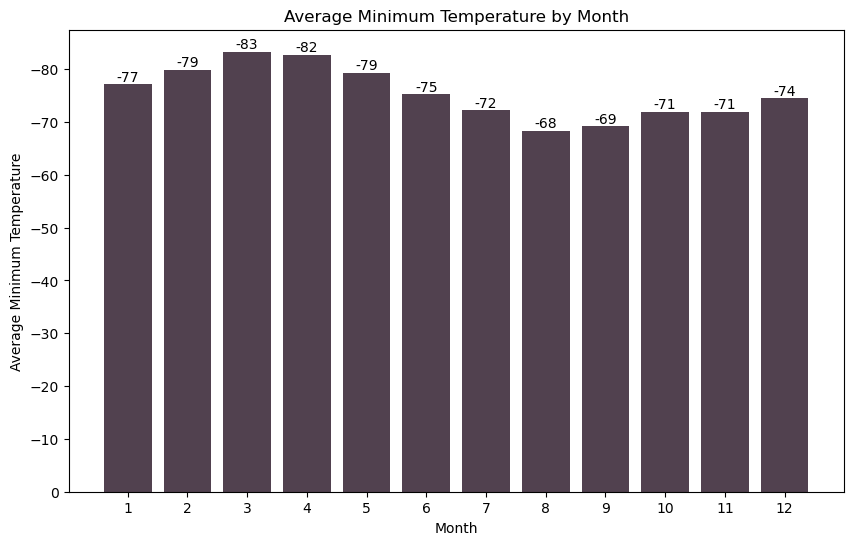

In [47]:
# Plotting the bar chart with reversed direction
plt.figure(figsize=(10, 6))

# Create bars with negative values at the bottom
bars = plt.bar(low_temp['month'], low_temp['min_temp'], color="#51414F")

# Set y-axis label and title
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature")
plt.title("Average Minimum Temperature by Month")

# Reverse the y-axis to make bars go upward - I used ChatGPT to help with reversing the bars as temps are negative
plt.gca().invert_yaxis()

# Annotate each bar with its value
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             str(int(bar.get_height())), ha='center', va='bottom')

# Set x-axis tick positions and labels explicitly
plt.xticks(low_temp['month'])

plt.show()

In [48]:
# 3. What is the average low temperature by month?
#Group by Month and get the mean (average) of the minimum temperature
low_temp = mars_temp_df.groupby("month")['min_temp'].mean()
low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [51]:
# Identify the coldest and hottest months in Curiosity's location
print(low_temp.idxmin(), low_temp.min())
print(low_temp.idxmax(), low_temp.max())

3 -83.30729166666667
8 -68.38297872340425


In [ ]:
print(low_temp.idxmin(), data.min())

In [54]:
# 4. Average pressure by Martian month
avg_pressure = mars_temp_df.groupby("month").pressure.mean().reset_index()
avg_pressure

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


Text(0.5, 1.0, 'Average Pressure by Month')

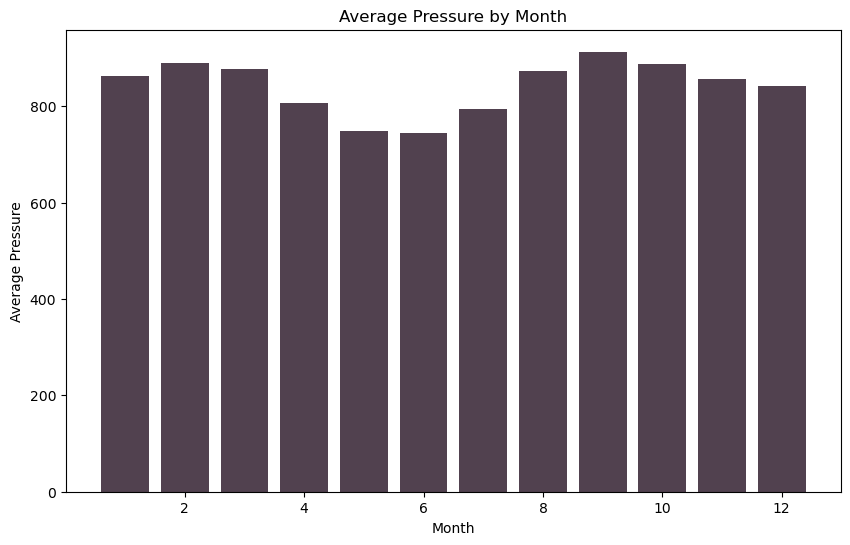

In [56]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Create bars 
bars = plt.bar(avg_pressure['month'], avg_pressure['pressure'], color="#51414F")

# Set y-axis label and title
plt.xlabel("Month")
plt.ylabel("Average Pressure")
plt.title("Average Pressure by Month")

In [57]:
# 4. Average pressure by Martian month
avg_pressure = mars_temp_df.groupby("month").pressure.mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [58]:
# Identify the highest and lowest pressures in Curiosity's location
print(avg_pressure.idxmax(), avg_pressure.max())
print(avg_pressure.idxmin(), avg_pressure.min())

9 913.3059701492538
6 745.0544217687075


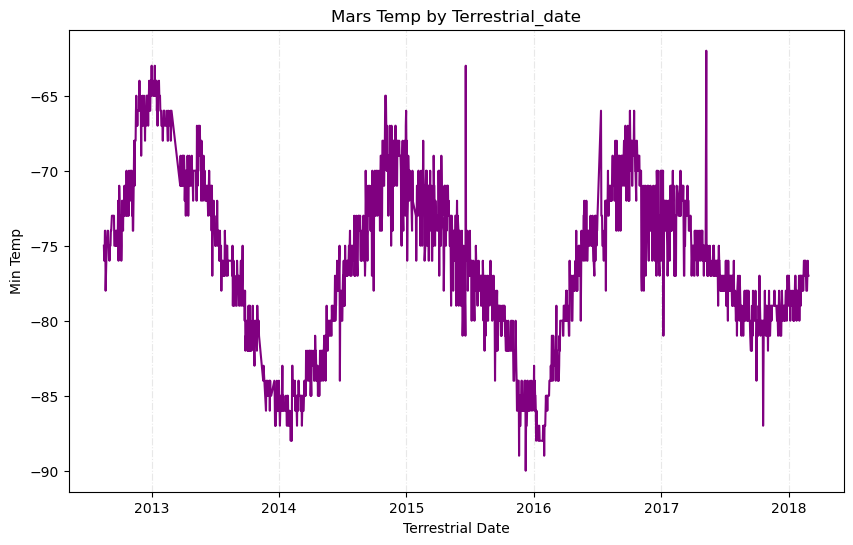

In [64]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.figure(figsize=(10,6))
plt.plot(mars_temp_df.terrestrial_date, mars_temp_df.min_temp, color="purple")
plt.xlabel("Terrestrial Date")
plt.ylabel("Min Temp")
plt.title("Mars Temp by Terrestrial_date")
plt.grid(axis="x", color="lightgrey", alpha=.5, linestyle="-.")
plt.show()

In [66]:
# Write the data to a CSV
mars_temp_df.to_csv('part_2_mars_weather_results.csv', index=False)
low_temp.to_csv('part_2_mars_weather_avgmintemp.csv', index=False)
avg_pressure.to_csv('part_2_mars_weather_avgpressure.csv', index=False)

In [67]:
# Close the Browser and Dev Tools
browser.quit()

#ANALYSIS:#
The coldest average minimum temperature on Mars is the third month.  The warmest average minimum temperature on Mars is the eight month#
The highest average pressure on Mars is the ninth month and the lowest average pressure on Mars is the six month#.
The distance from peak to peak for Mars Temp by Terrestrial day is approximately 1 year and 11 months of earth years, approx 665 days. A year #on Mars appears to be about 699 days per the visualization on the plot. According to NASA (https://science.nasa.gov/mars/facts/). Martian days a#re called sols – short for "solar day." A year on Mars lasts 669.6 sols, which is the same as 687 Earth days.